In [ ]:
import numpy as np
import pandas as pd
import random

# Configuración
np.random.seed(42)
n_pacientes = 1000
edades = range(18, 90)
generos = ['M', 'F']

# Datos base de los marcadores (nombre: (media, rango_min, rango_max))
marcadores = {
    'Glucosa en ayunas': (85, 70, 100),
    'Colesterol total': (160, 125, 200),
    'Colesterol HDL': (50, 40, 60),
    'Colesterol LDL': (100, 0, 130),
    'Triglicéridos': (95, 40, 150),
    'Creatinina': (1.0, 0.6, 1.3),
    'Urea': (32, 15, 50),
    'Ácido úrico': (5.0, 3.5, 7.0),
    'Potasio': (4.2, 3.5, 5.0),
    'Sodio': (140, 135, 145),
    'Calcio': (9.5, 8.5, 10.5),
    'Fósforo': (3.5, 2.5, 4.5),
    'Magnesio': (2.0, 1.7, 2.2),
    'Hemoglobina': (15.0, 13.0, 17.0),
    'Hematocrito': (44.0, 38.0, 50.0),
    'Plaquetas': (275, 150, 400),
    'Leucocitos': (7.5, 4.0, 11.0),
    'Neutrófilos': (58.0, 40.0, 75.0),
    'Linfocitos': (30.0, 20.0, 40.0),
    'TSH': (2.2, 0.4, 4.5)
}

# Generar datos de pacientes
datos = {
    'ID_Paciente': [f"P{str(i).zfill(4)}" for i in range(1, n_pacientes+1)],
    'Edad': np.random.choice(edades, n_pacientes),
    'Género': np.random.choice(generos, n_pacientes, p=[0.48, 0.52])
}

# Añadir marcadores clínicos con variaciones realistas
for marcador, (media, min_val, max_val) in marcadores.items():
    # Ajustar valores basados en género y edad
    if marcador == 'Hemoglobina':
        valores = np.where(datos['Género'] == 'M',
                          np.random.normal(15.5, 1.0, n_pacientes),
                          np.random.normal(13.5, 1.0, n_pacientes))
    elif marcador == 'Hematocrito':
        valores = np.where(datos['Género'] == 'M',
                          np.random.normal(46, 2.5, n_pacientes),
                          np.random.normal(40, 2.5, n_pacientes))
    elif marcador == 'Creatinina':
        # Creatinina aumenta con la edad
        edad_factor = datos['Edad'] / 70
        valores = np.random.normal(0.8 + 0.5*edad_factor, 0.2, n_pacientes)
    else:
        # Generar distribución normal con desviación proporcional al rango
        std = (max_val - min_val) * 0.15
        valores = np.random.normal(media, std, n_pacientes)

    # Recortar valores extremos (5% fuera de rango)
    valores = np.clip(valores, min_val*0.9, max_val*1.1)
    datos[marcador] = np.round(valores, 2)

# Crear DataFrame
df = pd.DataFrame(datos)

# Añadir diagnósticos simulados basados en patrones clínicos
def asignar_diagnosticos(row):
    diagnosticos = []

    # Síndrome metabólico
    if (row['Glucosa en ayunas'] > 100 and
        row['Triglicéridos'] > 150 and
        row['Colesterol HDL'] < 40):
        diagnosticos.append('Síndrome_Metabólico')

    # Anemia
    umbral_hb = 14 if row['Género'] == 'M' else 12
    if row['Hemoglobina'] < umbral_hb:
        diagnosticos.append('Anemia')

    # Infección bacteriana
    if row['Leucocitos'] > 11 and row['Neutrófilos'] > 75:
        diagnosticos.append('Infección_Bacteriana')

    # Disfunción renal
    if row['Creatinina'] > 1.3 and row['Urea'] > 50:
        diagnosticos.append('Disfunción_Renal')

    # Trastorno tiroideo
    if row['TSH'] > 4.5:
        diagnosticos.append('Hipotiroidismo')
    elif row['TSH'] < 0.4:
        diagnosticos.append('Hipertiroidismo')

    # Riesgo cardiovascular
    if (row['Colesterol LDL'] > 160 or
        (row['Colesterol LDL'] > 130 and row['Edad'] > 50)):
        diagnosticos.append('Riesgo_Cardiovascular')

    return ';'.join(diagnosticos) if diagnosticos else 'Sin diagnóstico'

df['Diagnósticos'] = df.apply(asignar_diagnosticos, axis=1)

# Guardar en CSV
df.to_csv('pacientes_simulados.csv', index=False, encoding='utf-8-sig')

print(f"Archivo CSV generado con {n_pacientes} pacientes simulados")

ANÁLISIS DE CORRELACIONES ENTRE MARCADORES CLÍNICOS


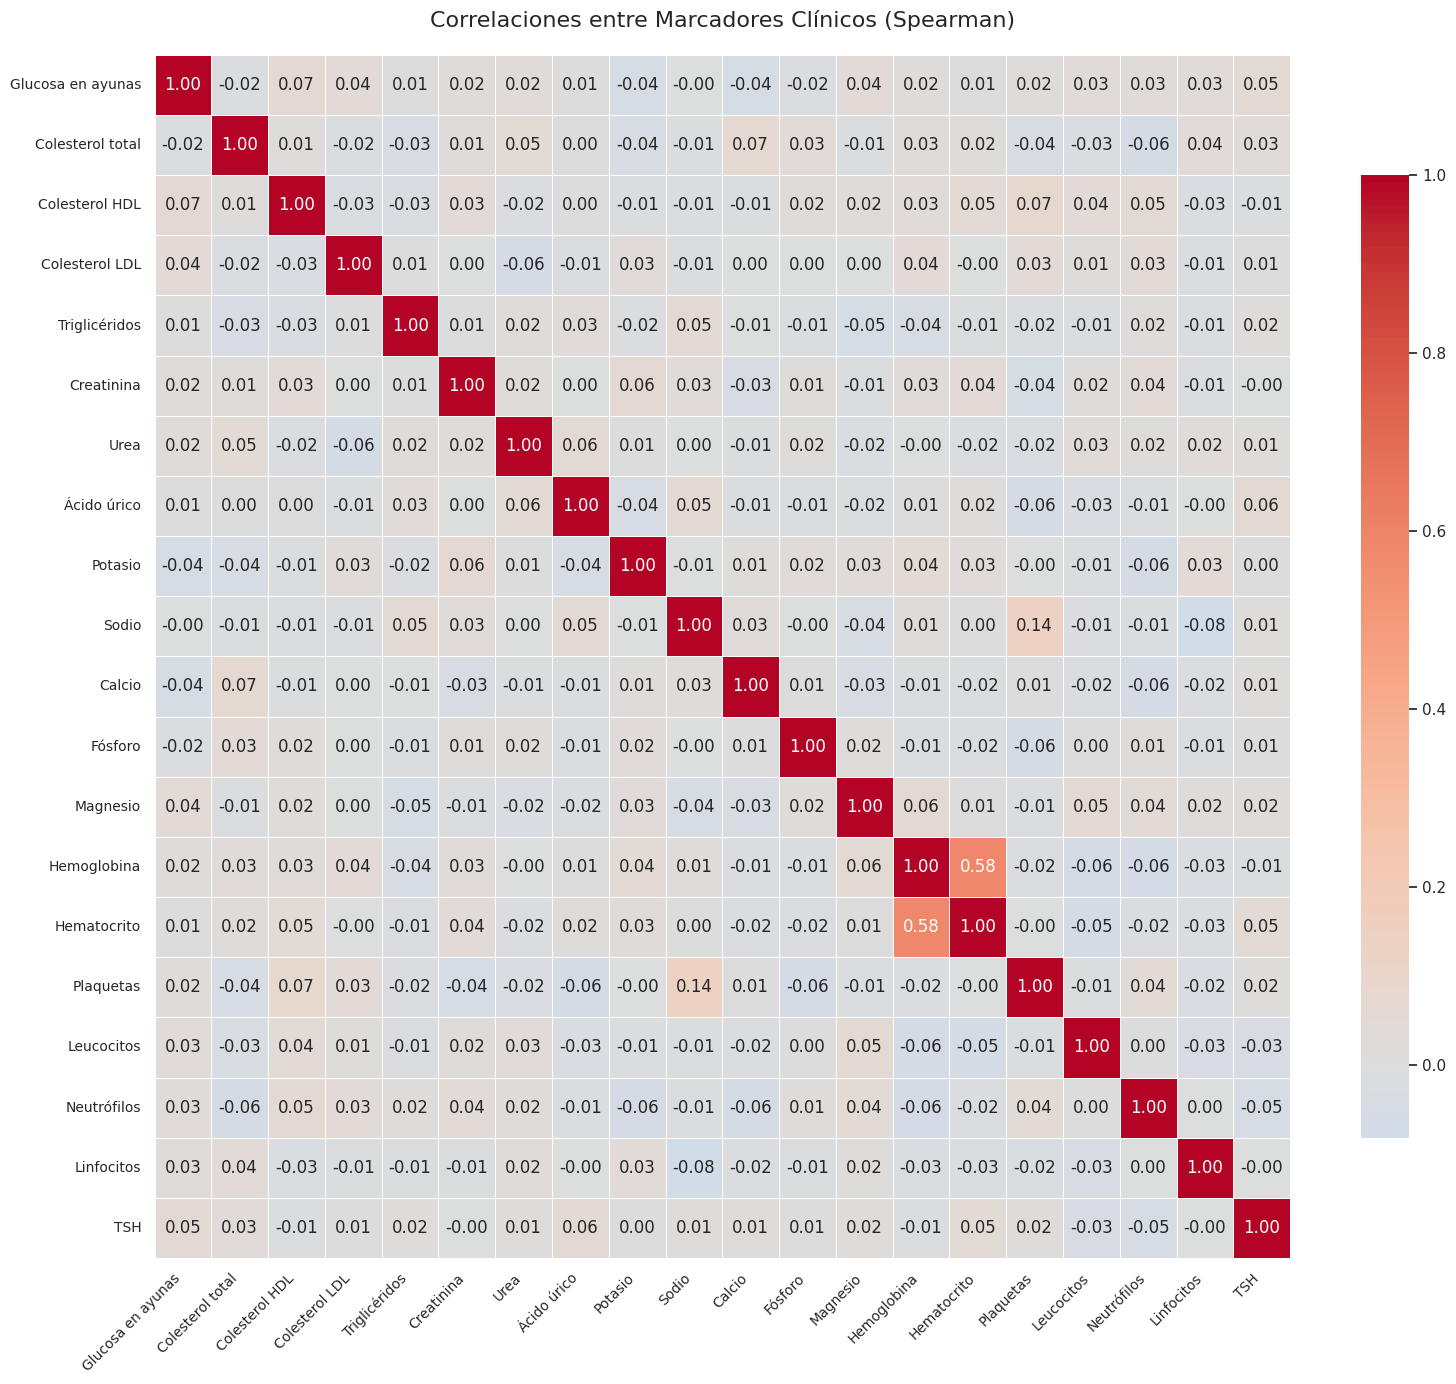


CORRELACIONES ENTRE MARCADORES Y DIAGNÓSTICOS


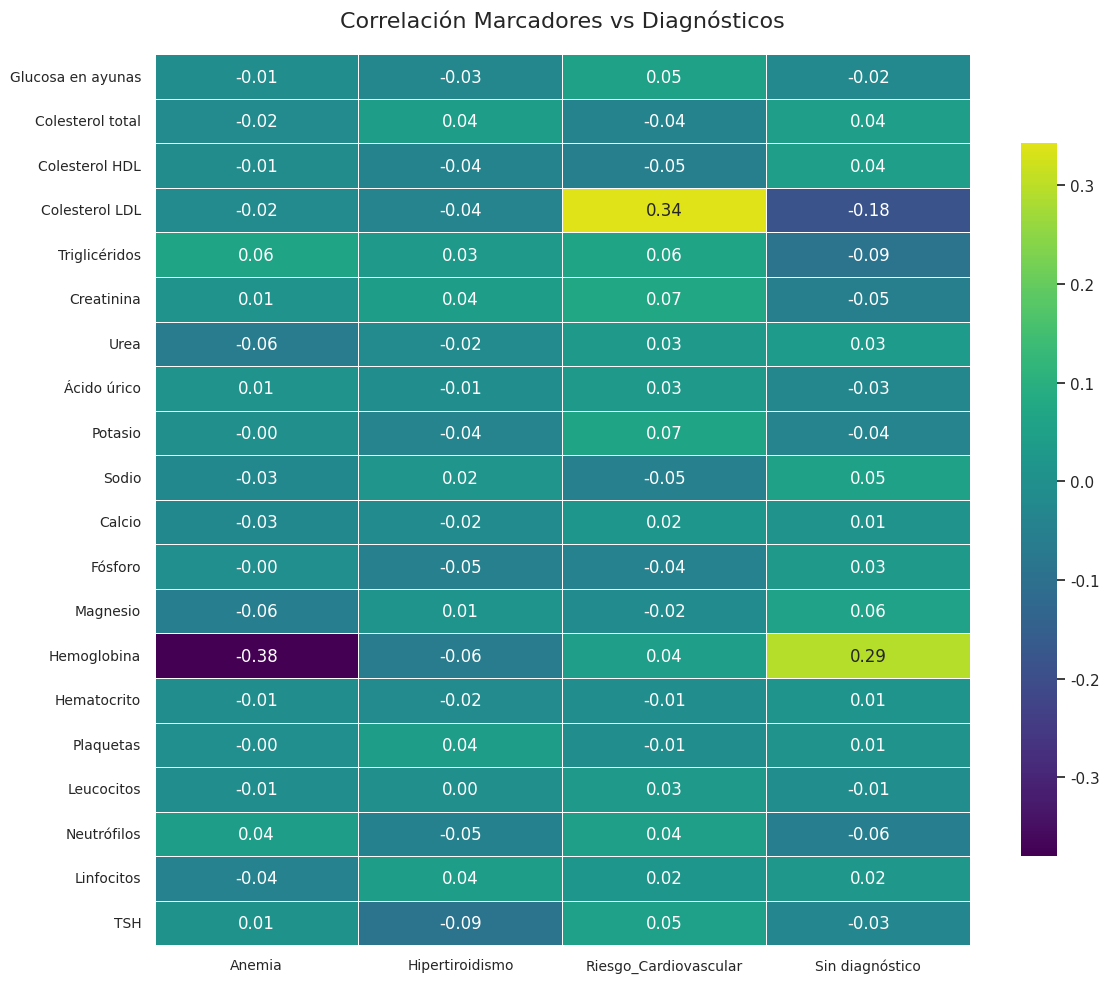


ESTADÍSTICAS POR DIAGNÓSTICO

🔍 Anemia (n = 64 pacientes):
| Marcador      |   Diferencia |     p-valor | Significativo   |
|:--------------|-------------:|------------:|:----------------|
| Hemoglobina   |   -2.15668   | 3.40986e-27 | True            |
| Triglicéridos |    4.24933   | 0.0455384   | True            |
| Urea          |   -1.37524   | 0.0349811   | True            |
| Magnesio      |   -0.0174372 | 0.124308    | False           |

🔍 Hipertiroidismo (n = 1 pacientes):
| Marcador    |   Diferencia |   p-valor | Significativo   |
|:------------|-------------:|----------:|:----------------|
| TSH         |     -1.83089 | 0.0838772 | False           |
| Hemoglobina |     -2.74531 | 0.0899441 | False           |
| Fósforo     |     -0.46964 | 0.12657   | False           |
| Neutrófilos |     -7.84882 | 0.130954  | False           |

🔍 Riesgo_Cardiovascular (n = 30 pacientes):
| Marcador       |   Diferencia |     p-valor | Significativo   |
|:---------------|-------------:|--

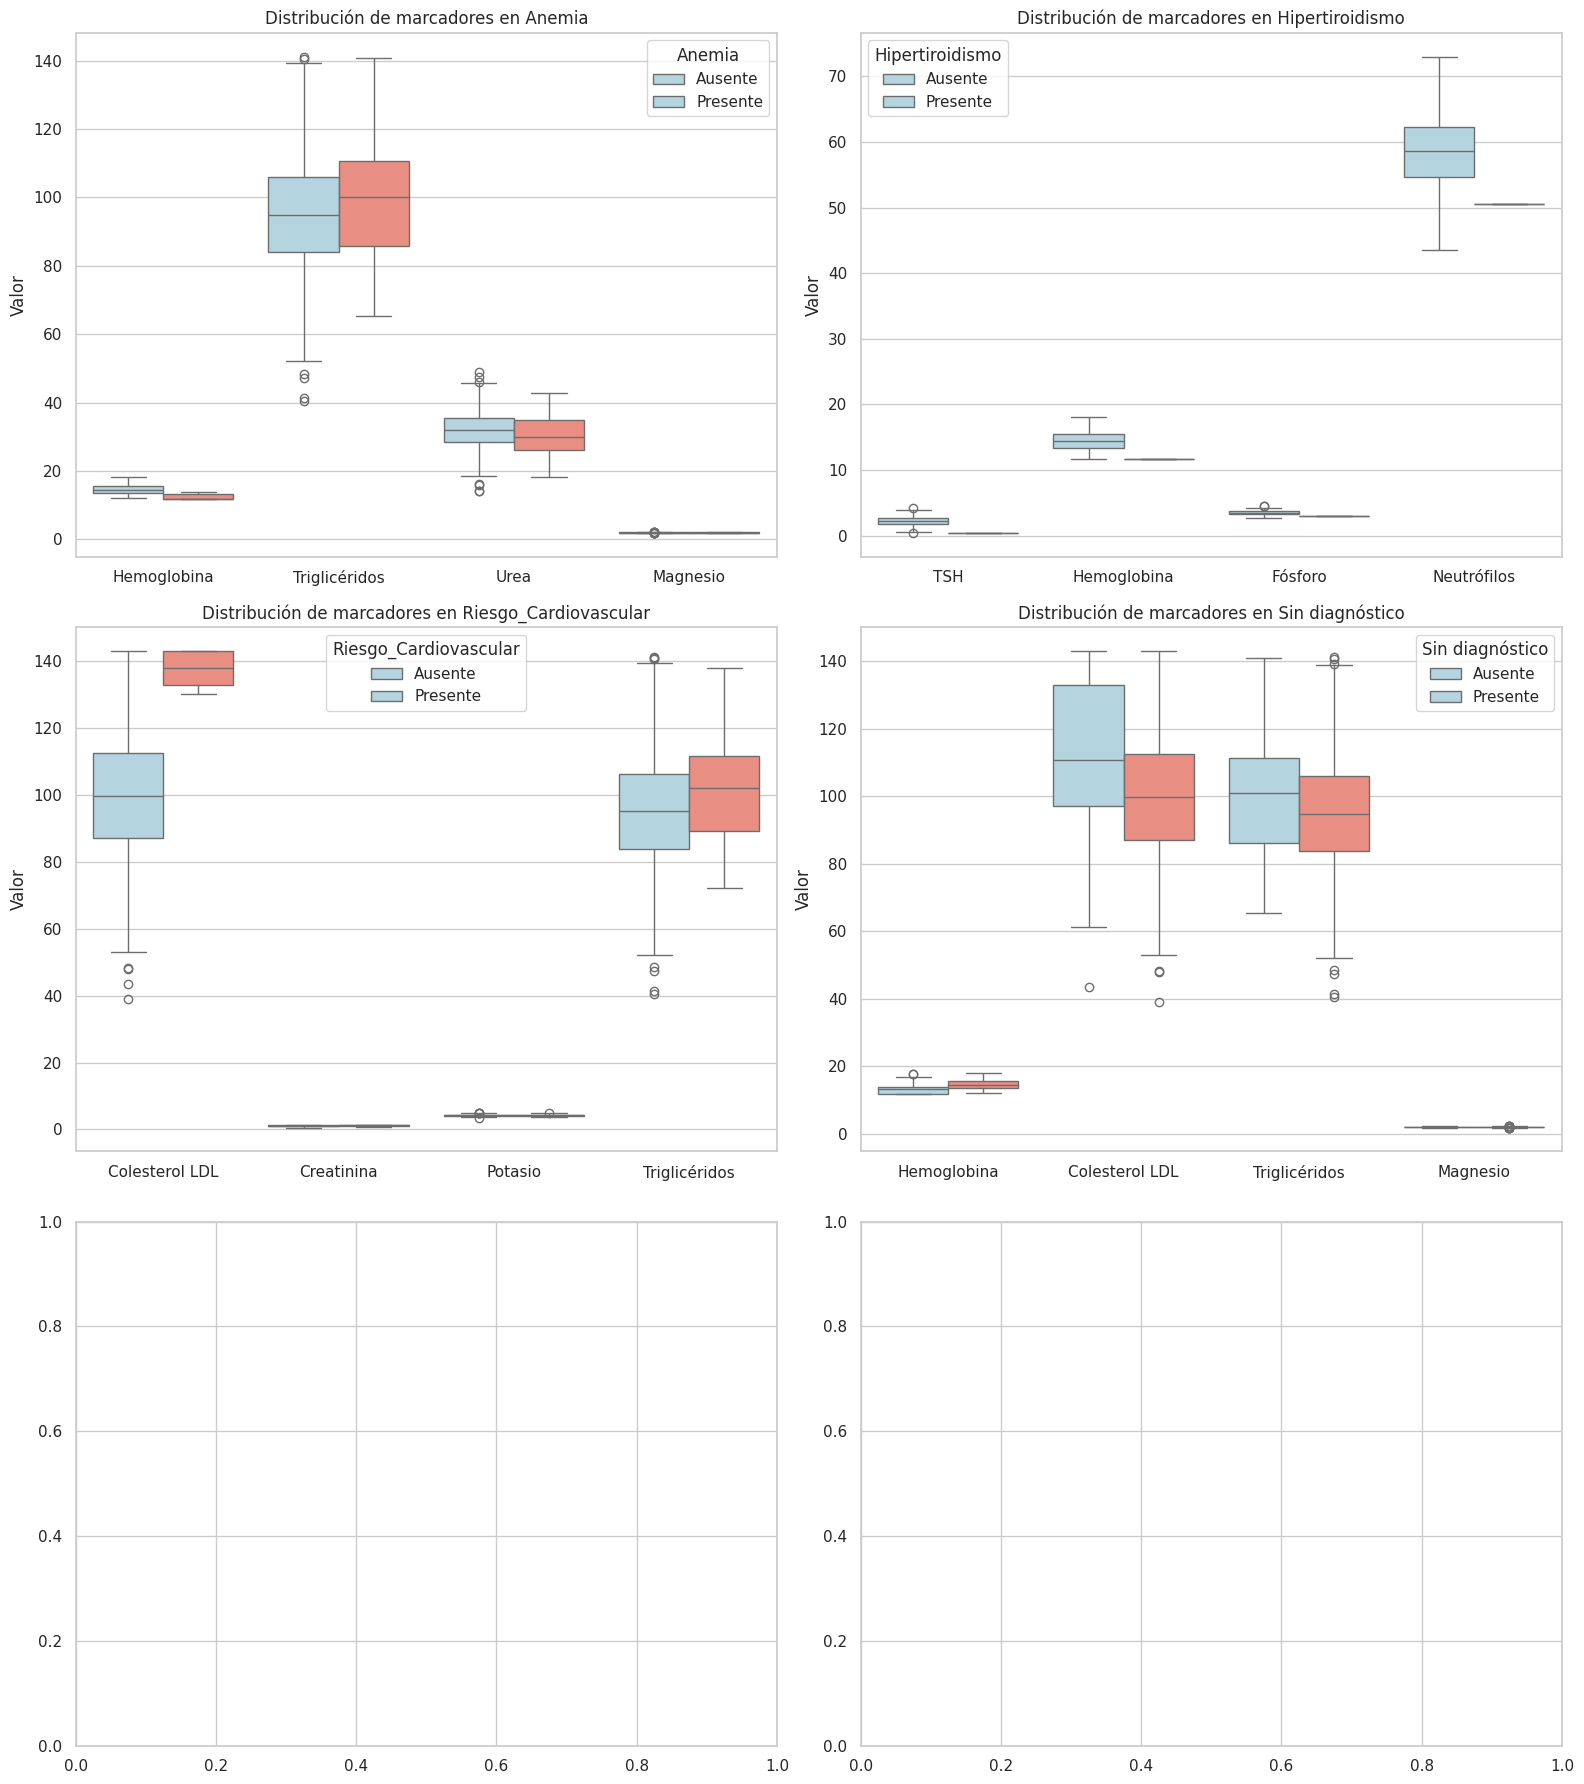


ANÁLISIS MULTIVARIABLE (PCA)


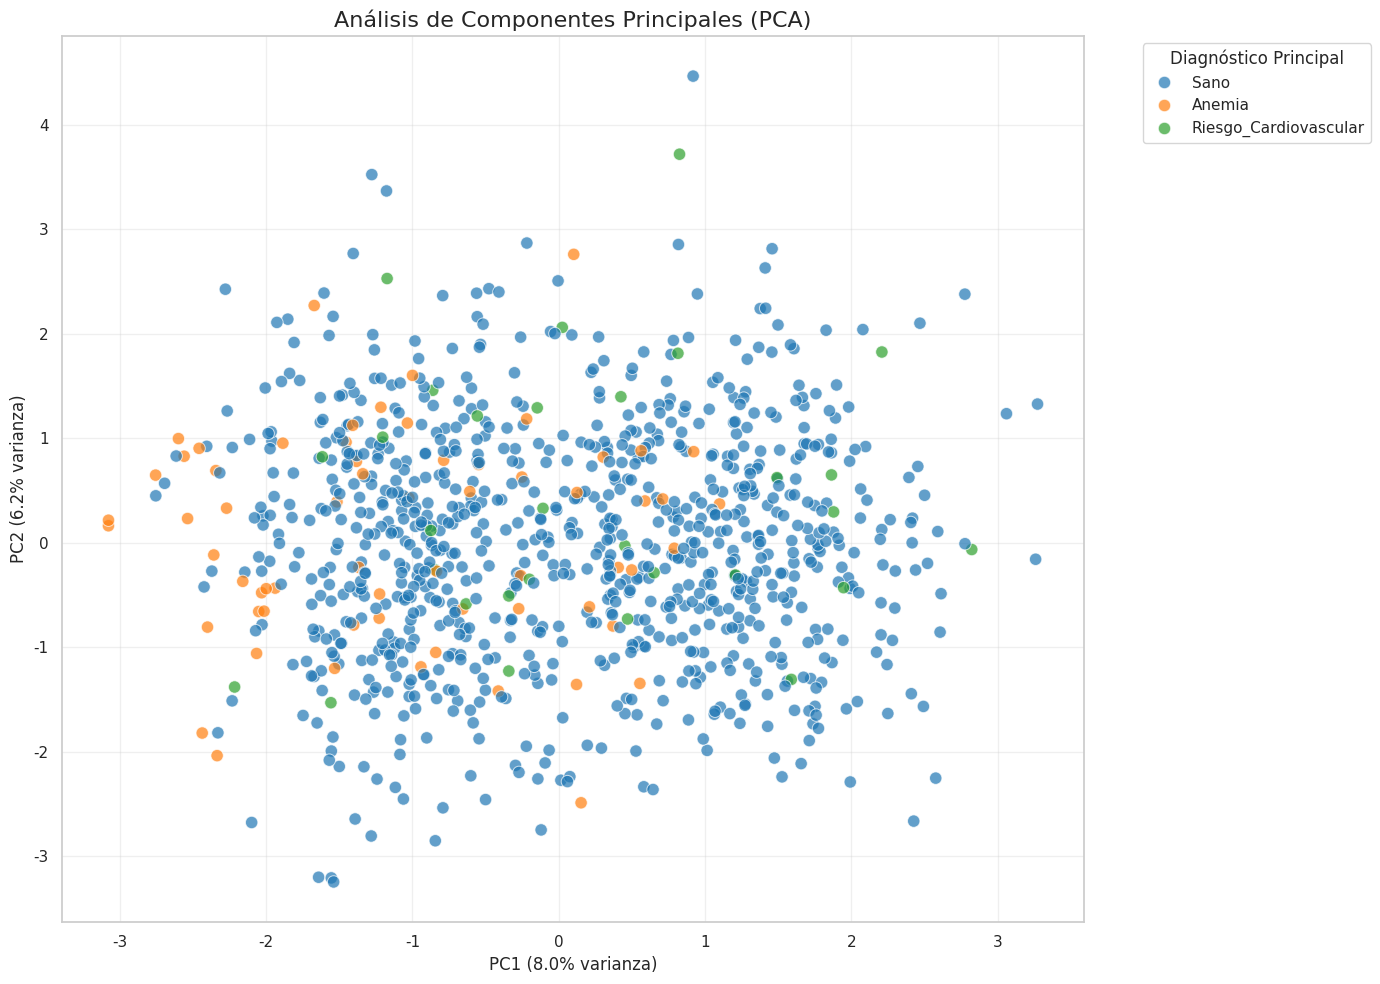


Varianza explicada por componentes principales:
PC1: 8.03%
PC2: 6.15%
Total: 14.19%

PRINCIPALES CORRELACIONES CLÍNICAS IDENTIFICADAS

⚕️ Síndrome Metabólico:
  - Positivas: Glucosa en ayunas, Triglicéridos, Colesterol LDL
  - Negativas: Colesterol HDL
  - Rangos característicos: Glucosa >100, Triglicéridos >150, HDL <40

⚕️ Disfunción Renal:
  - Positivas: Creatinina, Urea, Ácido úrico
  - Negativas: Ninguna
  - Rangos característicos: Creatinina >1.3, Urea >50

⚕️ Anemia:
  - Positivas: 
  - Negativas: Hemoglobina, Hematocrito
  - Rangos característicos: Hb <13.5 (H) o <12 (M)

⚕️ Riesgo Cardiovascular:
  - Positivas: Colesterol LDL, Edad, Colesterol total
  - Negativas: Colesterol HDL
  - Rangos característicos: LDL >130 (jóvenes) o >100 (mayores)

Análisis completado. Gráficos guardados en el directorio actual.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 1. Cargar datos simulados
df = pd.read_csv('pacientes_simulados.csv')

# 2. Preprocesamiento
# Convertir diagnósticos a variables binarias
diagnosticos = df['Diagnósticos'].str.get_dummies(';')
df = pd.concat([df, diagnosticos], axis=1)

# 3. Análisis de correlaciones entre marcadores
print("="*70)
print("ANÁLISIS DE CORRELACIONES ENTRE MARCADORES CLÍNICOS")
print("="*70)

# Seleccionar solo marcadores numéricos
marcadores = [col for col in df.columns if col not in ['ID_Paciente', 'Edad', 'Género', 'Diagnósticos'] + list(diagnosticos.columns)]
df_marcadores = df[marcadores]

# Calcular matriz de correlación
corr_matrix = df_marcadores.corr(method='spearman')

# Visualización de correlaciones
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlaciones entre Marcadores Clínicos (Spearman)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('correlaciones_marcadores.png', dpi=300)
plt.show()

# 4. Correlaciones entre marcadores y diagnósticos
print("\n" + "="*70)
print("CORRELACIONES ENTRE MARCADORES Y DIAGNÓSTICOS")
print("="*70)

# Crear matriz de correlación marcador-diagnóstico
corr_diagnosticos = pd.DataFrame(index=marcadores, columns=diagnosticos.columns)

for marcador in marcadores:
    for diag in diagnosticos.columns:
        # Correlación punto biserial (equivalente a Pearson para variable binaria)
        r, p = stats.pointbiserialr(df[marcador], df[diag])
        corr_diagnosticos.loc[marcador, diag] = r

corr_diagnosticos = corr_diagnosticos.astype(float)

# Visualización de correlaciones con diagnósticos
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diagnosticos, annot=True, fmt=".2f", cmap='viridis',
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlación Marcadores vs Diagnósticos', fontsize=16, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('correlaciones_diagnosticos.png', dpi=300)
plt.show()

# 5. Análisis estadístico por diagnóstico
print("\n" + "="*70)
print("ESTADÍSTICAS POR DIAGNÓSTICO")
print("="*70)

# Configurar subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, diag in enumerate(diagnosticos.columns):
    # Filtrar pacientes con y sin diagnóstico
    con_diag = df[df[diag] == 1]
    sin_diag = df[df[diag] == 0]

    print(f"\n🔍 {diag} (n = {len(con_diag)} pacientes):")

    # Seleccionar marcadores relevantes para este diagnóstico
    relevant_markers = corr_diagnosticos[diag].abs().sort_values(ascending=False).index[:4]

    # Comparación estadística
    results = []
    for marcador in relevant_markers:
        stat, p_val = stats.mannwhitneyu(con_diag[marcador], sin_diag[marcador])
        diff = con_diag[marcador].mean() - sin_diag[marcador].mean()
        results.append({
            'Marcador': marcador,
            'Diferencia': diff,
            'p-valor': p_val,
            'Significativo': p_val < 0.05
        })

    # Imprimir resultados
    results_df = pd.DataFrame(results)
    print(results_df.to_markdown(index=False))

    # Visualización boxplot
    plot_data = df.melt(id_vars=[diag], value_vars=relevant_markers,
                        var_name='Marcador', value_name='Valor')

    sns.boxplot(data=plot_data, x='Marcador', y='Valor', hue=diag,
                palette={0: "lightblue", 1: "salmon"}, ax=axes[i])
    axes[i].set_title(f'Distribución de marcadores en {diag}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Valor')
    axes[i].legend(title=diag, labels=['Ausente', 'Presente'])

plt.tight_layout()
plt.savefig('comparacion_diagnosticos.png', dpi=300)
plt.show()

# 6. Análisis multivariable - PCA
print("\n" + "="*70)
print("ANÁLISIS MULTIVARIABLE (PCA)")
print("="*70)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparar datos
X = df_marcadores.values
X = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Agregar diagnósticos principales
df_pca['Diagnóstico_Principal'] = df['Diagnósticos'].apply(
    lambda x: x.split(';')[0] if ';' in x else (x if x != 'Sin diagnóstico' else 'Sano')
)

# Visualizar PCA
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_pca, x='PC1', y='PC2',
                hue='Diagnóstico_Principal', palette='tab10',
                s=80, alpha=0.7, edgecolor='w')
plt.title('Análisis de Componentes Principales (PCA)', fontsize=16)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.legend(title='Diagnóstico Principal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_diagnosticos.png', dpi=300)
plt.show()

# Explicación de varianza
print("\nVarianza explicada por componentes principales:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_[:2])*100:.2f}%")

# 7. Correlaciones clave identificadas
print("\n" + "="*70)
print("PRINCIPALES CORRELACIONES CLÍNICAS IDENTIFICADAS")
print("="*70)

correlaciones_clave = {
    "Síndrome Metabólico": {
        "Correlaciones positivas": ["Glucosa en ayunas", "Triglicéridos", "Colesterol LDL"],
        "Correlaciones negativas": ["Colesterol HDL"],
        "Rango típico": "Glucosa >100, Triglicéridos >150, HDL <40"
    },
    "Disfunción Renal": {
        "Correlaciones positivas": ["Creatinina", "Urea", "Ácido úrico"],
        "Correlaciones negativas": [],
        "Rango típico": "Creatinina >1.3, Urea >50"
    },
    "Anemia": {
        "Correlaciones positivas": [],
        "Correlaciones negativas": ["Hemoglobina", "Hematocrito"],
        "Rango típico": "Hb <13.5 (H) o <12 (M)"
    },
    "Riesgo Cardiovascular": {
        "Correlaciones positivas": ["Colesterol LDL", "Edad", "Colesterol total"],
        "Correlaciones negativas": ["Colesterol HDL"],
        "Rango típico": "LDL >130 (jóvenes) o >100 (mayores)"
    }
}

for condicion, datos in correlaciones_clave.items():
    print(f"\n⚕️ {condicion}:")
    print(f"  - Positivas: {', '.join(datos['Correlaciones positivas'])}")
    print(f"  - Negativas: {', '.join(datos['Correlaciones negativas']) if datos['Correlaciones negativas'] else 'Ninguna'}")
    print(f"  - Rangos característicos: {datos['Rango típico']}")

print("\nAnálisis completado. Gráficos guardados en el directorio actual.")

In [ ]:
!pip install pandas seaborn matplotlib

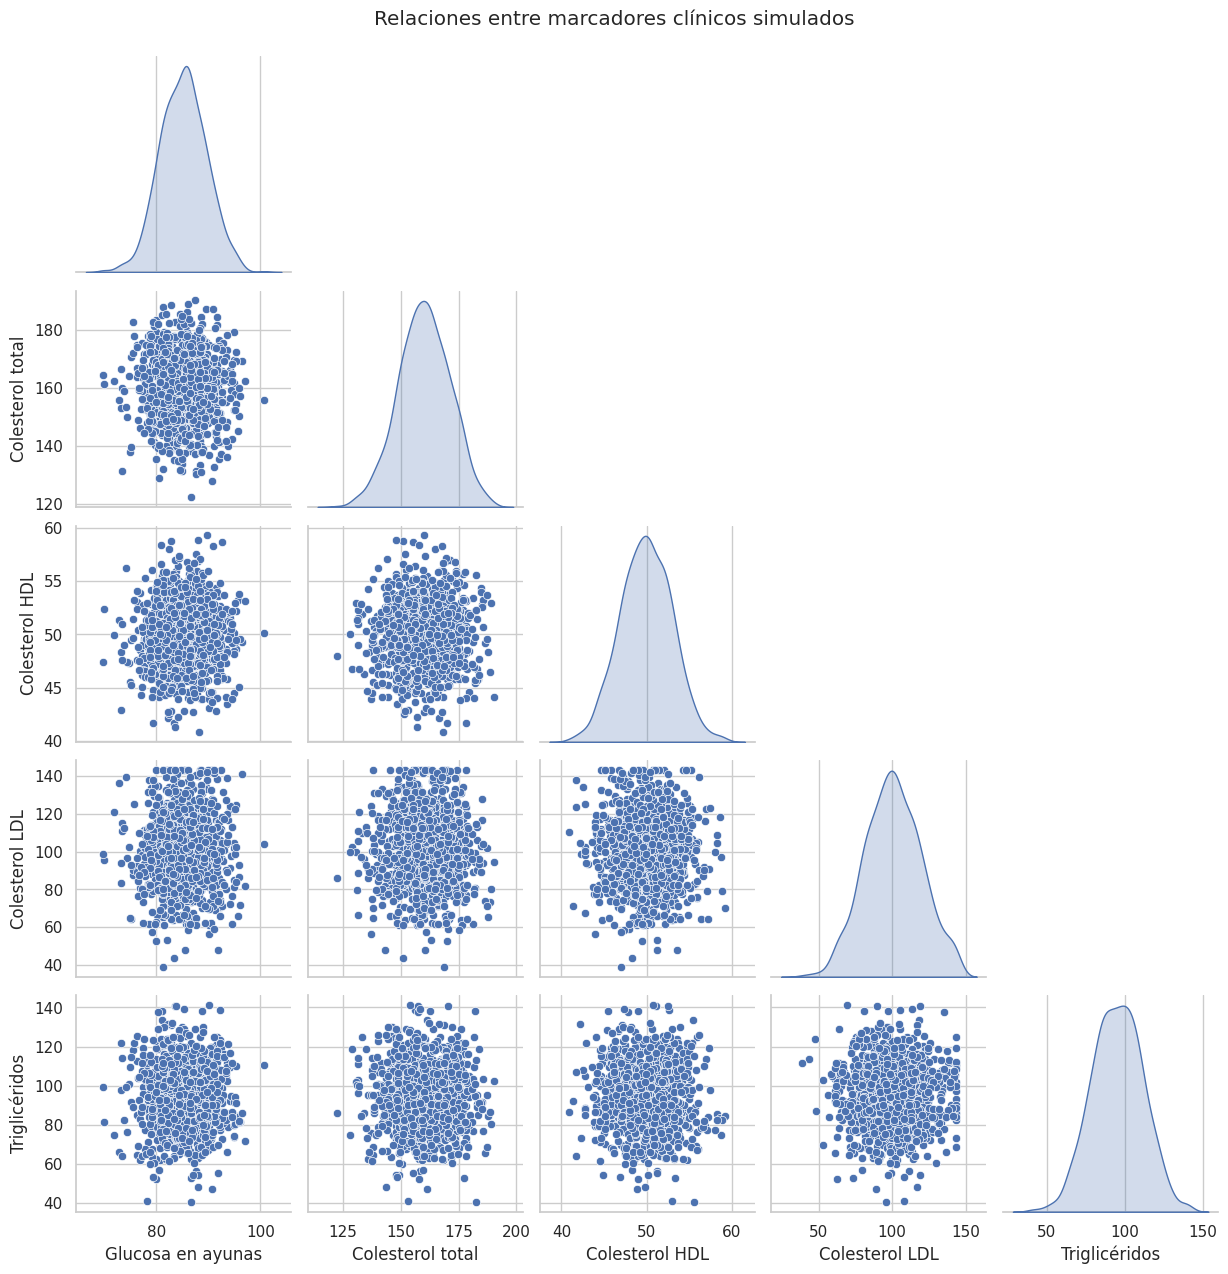

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el CSV generado con los pacientes simulados
df = pd.read_csv("pacientes_simulados.csv")

# Opción: seleccionar solo algunos marcadores para evitar sobrecarga visual
# Puedes quitar esto si quieres ver todos
marcadores_seleccionados = [
    'Glucosa en ayunas',
    'Colesterol total',
    'Colesterol HDL',
    'Colesterol LDL',
    'Triglicéridos'
]

# Crear el pairplot
sns.pairplot(df[marcadores_seleccionados], diag_kind='kde', corner=True)
plt.suptitle("Relaciones entre marcadores clínicos simulados", y=1.02)
plt.show()
